<a href="https://colab.research.google.com/github/sherermi/NGG6050/blob/main/Probability_Distributions_09082023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mia Sherer

Probability Distributions Homework 09/08/2023

QNC Fall 2023

Reference:
Asadollahi, R., Delvendahl, I., Muff, R., Tan, G., Rodríguez, D. G., Turan, S., Russo, M., Oneda, B., Joset, P., Boonsawat, P., Masood, R., Mocera, M., Ivanovski, I., Baumer, A., Bachmann-Gagescu, R., Schlapbach, R., Rehrauer, H., Steindl, K., Begemann, A., Reis, A., … Rauch, A. (2023). Pathogenic SCN2A variants cause early-stage dysfunction in patient-derived neurons. Human molecular genetics, 32(13), 2192–2204. https://doi.org/10.1093/hmg/ddad048

Figure 3D



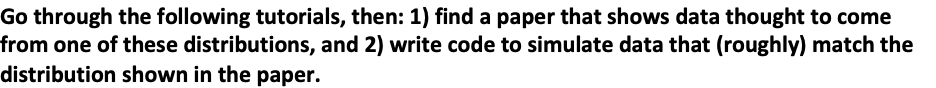

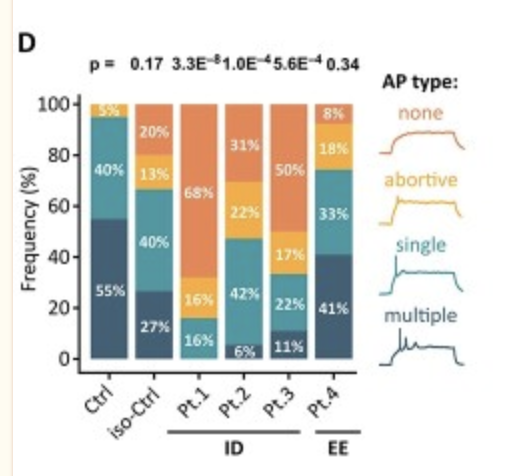

The authors are evaluating the probability neurons from contol and patient lines will fire. They divide their findings into 4 categories of possibilities: none, abortive, single or multiple APs. These catergories can be combined to reflect two possible outcomes, no action potentials are generated, or 1 or more are generated.

This is a Bernoulli distribution. The possible outcomes for the trial are a "success" when the neuron fires atleast 1 AP or a "failure" when the neuron fires no APs.

Ctrl lines fire ~70-95% of trials.
Pt. 4 is similar to controls and fires ~75% of trials.
Pt. 1-3 are fire only ~15-50% of trials.


In [ ]:
%%Run in Matlab


% Set number of repetitions (samples)
num_repetitions = 6; % 3 reps of ID patient cell lines, 3 reps for controls and EE patient lines

figure; % Create a new figure

for rep = 1:num_repetitions
    % Generate a random probability between 0.15 and 0.50 for the ID patients
    % Generate a random probability between 0.7 and 0.95 for the EE patient and contorl lines
    if rep <= 3
        min_probability = 0.15;
        max_probability = 0.50;
        patient_label = sprintf('Patient %d (ID)', rep);
    else
        min_probability = 0.7;
        max_probability = 0.95;
        if rep == 4
            patient_label = 'Ctrl 1';
        elseif rep == 5
            patient_label = 'Iso-ctrl 2';
        else
            patient_label = 'Patient 4 (EE)';
        end
    end
    p = min_probability + (max_probability - min_probability) * rand();

    fprintf('Simulation %d (%s, p = %.2f):\n', rep, patient_label, p);

    % Now generate lots of Bernoulli trials to check if it is converging on the appropriate probability
    % Number of Bernoulli trials to simulate
    N = 10000;

    % Use rand() to generate outcomes (an array) from a lot of trials
    outcomes = rand(1, N) < p;

    % Count "No APs" (zeros) and "APs" (ones)
    num_no_aps = sum(outcomes == 0);
    num_aps = sum(outcomes == 1);

    % Display the results
    fprintf('%d No APs, %d APs, simulated p = %.4f, empirical p = %.4f\n', ...
        num_no_aps, num_aps, mean(outcomes), p);

    % Calculate percentages
    total_samples = numel(outcomes);
    percentage_no_aps = (num_no_aps / total_samples) * 100;
    percentage_aps = (num_aps / total_samples) * 100;

    % Create a subplot for each repetition
    subplot(2, 3, rep); % 2 rows, 3 columns
    bar([0, 1], [percentage_no_aps, percentage_aps], 'stacked'); % Stack bars vertically
    xlabel('Outcome');
    ylabel('Percentage');
    title(sprintf('%s (p = %.2f)', patient_label, p));
    set(gca, 'XTickLabel', {'No APs', 'APs'}); % Label the zeros as "No APs"
    ylim([0, 100]); % Set Y-axis limit to 0-100%
end